In [74]:
import numpy as np
import pandas as pd
import optuna
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
np.random.seed(5452165)
n_rows = 1000
folhas_1 = np.random.randint(1, 9, size=n_rows)
folhas_2 = np.random.randint(1, 15, size=n_rows)
porte_resp = np.random.randint(1, 5, size=n_rows)

df = pd.DataFrame({
    'folhas_1': folhas_1,
    'folhas_2': folhas_2,
    'porte_resp': porte_resp
})


In [13]:
df.head()

,folhas_1,folhas_2,porte_resp
0,2,14,2
1,5,6,3
2,1,12,4
3,3,1,4
4,1,3,4


In [15]:
def check_matrix(matrix):
    """
    Valida se a matriz não tem valores únicos em todas as posições de uma linha ou coluna.
    """
    # Verifica as linhas
    for row in matrix:
        if len(set(row)) == 1:
            return False

    # Verifica as colunas
    for col in matrix.T:
        if len(set(col)) == 1:
            return False

    return True

In [44]:
N = 8  # Número de linhas
P = 14  # Número de colunas

# Inicializar a matriz com valores crescentes nas linhas e colunas, limitados até 4
initial_matrix = np.zeros((N, P), dtype=int)

# Atribuir valores sequenciais crescentes da linha para a direita e da coluna para baixo
for i in range(N):
    for j in range(P):
        initial_matrix[i, j] = (i + j) % 4 + 1

# Exibir a matriz inicial gerada
print("Matriz inicial com valores crescentes da linha para a direita e da coluna para baixo:")
initial_matrix.sort(axis=1)
initial_matrix.sort(axis=0)
print(initial_matrix)

Matriz inicial com valores crescentes da linha para a direita e da coluna para baixo:
[[1 1 1 1 2 2 2 2 3 3 3 4 4 4]
 [1 1 1 1 2 2 2 2 3 3 3 4 4 4]
 [1 1 1 1 2 2 2 3 3 3 3 4 4 4]
 [1 1 1 1 2 2 2 3 3 3 3 4 4 4]
 [1 1 1 2 2 2 2 3 3 3 4 4 4 4]
 [1 1 1 2 2 2 2 3 3 3 4 4 4 4]
 [1 1 1 2 2 2 3 3 3 3 4 4 4 4]
 [1 1 1 2 2 2 3 3 3 3 4 4 4 4]]


In [52]:
# Definir as dimensões da matriz
N = 8  # Número de linhas
P = 14  # Número de colunas

# Distribuição de valores nas linhas (14 elementos, 4 valores)
valores_linha = np.tile(np.arange(1, 5), N // 4 + 1)[:N]

# Distribuição de valores nas colunas (8 elementos, 4 valores)
valores_coluna = np.tile(np.arange(1, 5), P // 4 + 1)[:P]

# Inicializar a matriz com os valores distribuídos nas linhas e colunas
matriz = np.zeros((N, P), dtype=int)

for i in range(N):
    for j in range(P):
        matriz[i, j] = max(valores_linha[i], valores_coluna[j])

# Ordenar a matriz nas linhas e colunas
matriz = np.sort(matriz, axis=1)  # Ordenar cada linha
matriz = np.sort(matriz, axis=0)  # Ordenar cada coluna

# Exibir a matriz
print("Matriz com valores distribuídos de forma crescente e ordenada nas linhas e colunas:")
print(matriz)

Matriz com valores distribuídos de forma crescente e ordenada nas linhas e colunas:
[[1 1 1 1 2 2 2 2 3 3 3 4 4 4]
 [1 1 1 1 2 2 2 2 3 3 3 4 4 4]
 [2 2 2 2 2 2 2 2 3 3 3 4 4 4]
 [2 2 2 2 2 2 2 2 3 3 3 4 4 4]
 [3 3 3 3 3 3 3 3 3 3 3 4 4 4]
 [3 3 3 3 3 3 3 3 3 3 3 4 4 4]
 [4 4 4 4 4 4 4 4 4 4 4 4 4 4]
 [4 4 4 4 4 4 4 4 4 4 4 4 4 4]]


In [53]:
matriz.shape

(8, 14)

In [58]:
def objective(trial):

    linhas = list(np.sort(np.unique(df['folhas_1'])))
    colunas = list(np.sort(np.unique(df['folhas_2'])))

    n_linhas = len(linhas)
    n_colunas = len(colunas)

    mapa_linhas = {label: i for i, label in enumerate(linhas)}
    mapa_colunas = {label: i for i, label in enumerate(colunas)}
    
    def get_valor(linha, coluna):
        return matrix[mapa_linhas[linha]][mapa_colunas[coluna]]
    
    if trial.number == 0:
        # Criação da Matriz Inicial    
        valores_linha = np.tile(np.arange(1, 5), n_linhas // 4 + 1)[:n_linhas]

        # Distribuição de valores nas colunas (8 elementos, 4 valores)
        valores_coluna = np.tile(np.arange(1, 5), n_colunas // 4 + 1)[:n_colunas]

        # Inicializar a matriz com os valores distribuídos nas linhas e colunas
        matrix = np.zeros((n_linhas, n_colunas), dtype=int)

        for i in range(n_linhas):
            for j in range(n_colunas):
                matrix[i, j] = max(valores_linha[i], valores_coluna[j])

        # Ordenar a matriz nas linhas e colunas
        matrix = np.sort(matrix, axis=1)  # Ordenar cada linha
        matrix = np.sort(matrix, axis=0)  # Ordenar cada coluna

    else:            
        matrix = np.zeros((n_linhas, n_colunas), dtype=int)
        for i in range(n_linhas):
            for j in range(n_colunas):
                # low = max(1, matrix[i-1,j] if i > 0 else 1, matrix[i, j-1] if j > 0 else 1)
                if i == 0 and j == 0:
                    matrix[i, j] = trial.suggest_int(f'element_{i}_{j}', 1, 1)
                elif i == 0:
                    matrix[i, j] = trial.suggest_int(f'element_{i}_{j}', int(matrix[i, j-1]), 4)
                elif j == 0:
                    matrix[i, j] = trial.suggest_int(f'element_{i}_{j}', int(matrix[i-1, j]), 4)
                else:
                    matrix[i, j] = trial.suggest_int(f'element_{i}_{j}', max(int(matrix[i-1, j]), int(matrix[i, j-1])), 4)

        if not check_matrix(matrix):
            return 0
    
    get_valor_vetorizado = np.vectorize(get_valor)

    df['pred'] = get_valor_vetorizado(df['folhas_1'], df['folhas_2'])

    # Calcular a acurácia
    
    accuracy = accuracy_score(df['porte_resp'],  df['pred'])
    
    return accuracy




# Passo 3: Criar e executar a otimização
# study = optuna.create_study(direction='maximize')
study = optuna.create_study(direction='maximize', sampler=optuna.samplers.TPESampler(seed=10))
study.optimize(objective, n_trials=300)

# Exibir os melhores parâmetros
best_params = study.best_params

best_matrix = np.zeros((8, 14))
for i in range(8):
    for j in range(14):
        best_matrix[i, j] = best_params[f'element_{i}_{j}']
# print("Melhores parâmetros:", best_params)
print("Melhor acurácia:", study.best_value)
print("Melhor matriz:")
print(best_matrix)

[I 2024-06-25 23:15:05,062] A new study created in memory with name: no-name-f31296f7-393e-4c07-9445-91b88728847d
[I 2024-06-25 23:15:05,093] Trial 0 finished with value: 0.238 and parameters: {}. Best is trial 0 with value: 0.238.
[I 2024-06-25 23:15:05,168] Trial 1 finished with value: 0.0 and parameters: {'element_0_0': 1, 'element_0_1': 1, 'element_0_2': 2, 'element_0_3': 2, 'element_0_4': 4, 'element_0_5': 4, 'element_0_6': 4, 'element_0_7': 4, 'element_0_8': 4, 'element_0_9': 4, 'element_0_10': 4, 'element_0_11': 4, 'element_0_12': 4, 'element_0_13': 4, 'element_1_0': 2, 'element_1_1': 4, 'element_1_2': 4, 'element_1_3': 4, 'element_1_4': 4, 'element_1_5': 4, 'element_1_6': 4, 'element_1_7': 4, 'element_1_8': 4, 'element_1_9': 4, 'element_1_10': 4, 'element_1_11': 4, 'element_1_12': 4, 'element_1_13': 4, 'element_2_0': 3, 'element_2_1': 4, 'element_2_2': 4, 'element_2_3': 4, 'element_2_4': 4, 'element_2_5': 4, 'element_2_6': 4, 'element_2_7': 4, 'element_2_8': 4, 'element_2_9': 4

Melhor acurácia: 0.267
Melhor matriz:
[[1. 1. 1. 1. 2. 3. 3. 3. 3. 3. 3. 3. 3. 3.]
 [1. 1. 3. 3. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4.]
 [2. 3. 3. 3. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4.]
 [2. 3. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4.]
 [3. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4.]
 [3. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4.]
 [3. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4.]
 [3. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4.]]


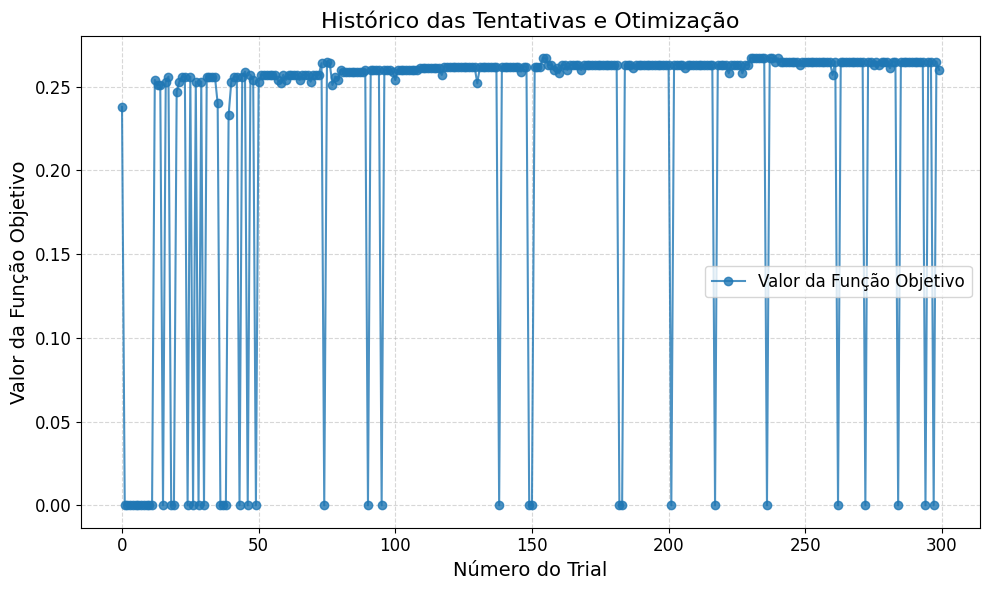

In [87]:
df_study = study.trials_dataframe()
best_trial = study.best_trial

# Plotar gráfico do histórico das tentativas e otimização da métrica
plt.figure(figsize=(10, 6))
plt.plot(df_study['number'], df_study['value'], marker='o', linestyle='-',  alpha=0.8, label='Valor da Função Objetivo')
plt.xlabel('Número do Trial', fontsize=14)
plt.ylabel('Valor da Função Objetivo', fontsize=14)
plt.title('Histórico das Tentativas e Otimização', fontsize=16)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

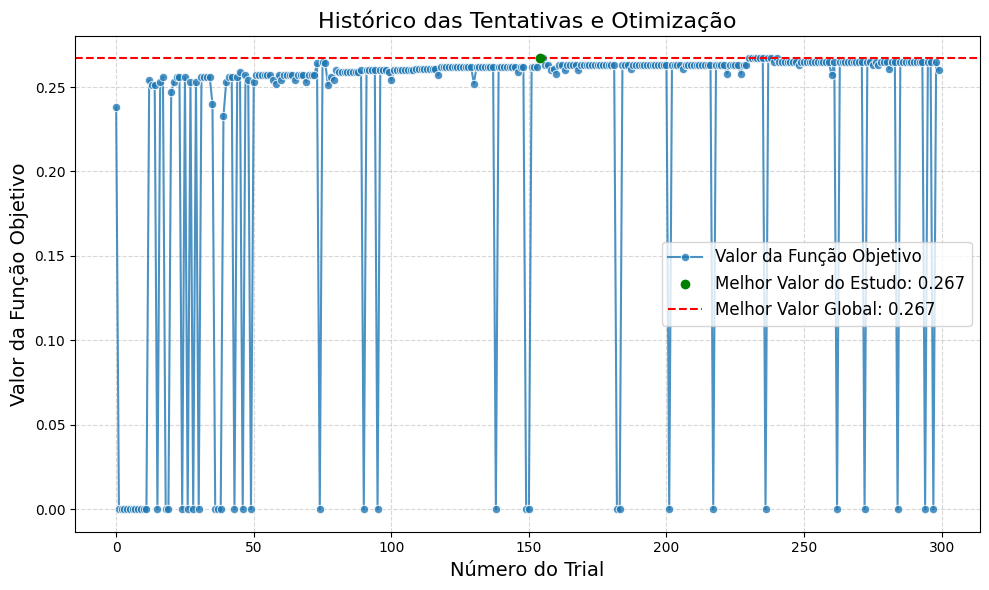

In [88]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='number', y='value', data=df_study, marker='o', alpha=0.8, label='Valor da Função Objetivo')
# plt.scatter(study.best_trial.number, study.best_trial.value, color='green', label=f'Melhor Valor do Estudo: {study.best_trial.value:.3f}', zorder=5)
plt.scatter(best_trial.number, best_trial.value, color='green', label=f'Melhor Valor do Estudo: {best_trial.value:.3f}', zorder=5)
# Destacar o best_value com uma linha horizontal
plt.axhline(y=study.best_value, color='red', linestyle='--', label=f'Melhor Valor Global: {study.best_value:.3f}')

plt.xlabel('Número do Trial', fontsize=14)
plt.ylabel('Valor da Função Objetivo', fontsize=14)
plt.title('Histórico das Tentativas e Otimização', fontsize=16)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()